# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# mini.csv 파일을 읽어 데이터 프레임으로 변환하고 처음 10개 행 출력

mini = pd.read_table('data/mini.csv',sep=',')
mini.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [350]:
# # mini 에서 target 값이 1인 행을 선택
# target_1_subscription_duration_1 = mini[mini['target'] == 1]['subscription_duration']


# # 그래프 생성
# plt.figure(figsize=(10, 6))
# plt.hist(target_1_subscription_duration_1, bins=20, color='skyblue', edgecolor='black',  alpha=0.7 )
# plt.title('Target 1의 사용자가 서비스에 가입한 기간 분포')
# plt.xlabel('서비스에 가입한 기간(월)')
# plt.ylabel('사용자 수', labelpad=35, rotation=360 )
# plt.grid(True)
# plt.show()

In [351]:
# # mini 에서 target 값이 1인 행을 선택
# target_1_subscription_duration_2 = mini[mini['target'] == 1]

# # 사용자가 서비스에 가입한 기간 (월)의 분포 계산
# subscription_duration_distribution = target_1_subscription_duration_2['subscription_duration'].value_counts().sort_index()

# # 꺽은선 그래프 시각화
# plt.figure(figsize=(10, 6))
# subscription_duration_distribution.plot(kind='line', marker='o')
# plt.title('Target 1의 사용자가 서비스에 가입한 기간 분포')
# plt.xlabel('서비스에 가입한 기간(월)')
# plt.ylabel('사용자 수', labelpad=35, rotation=360)
# plt.grid(True)
# plt.show()

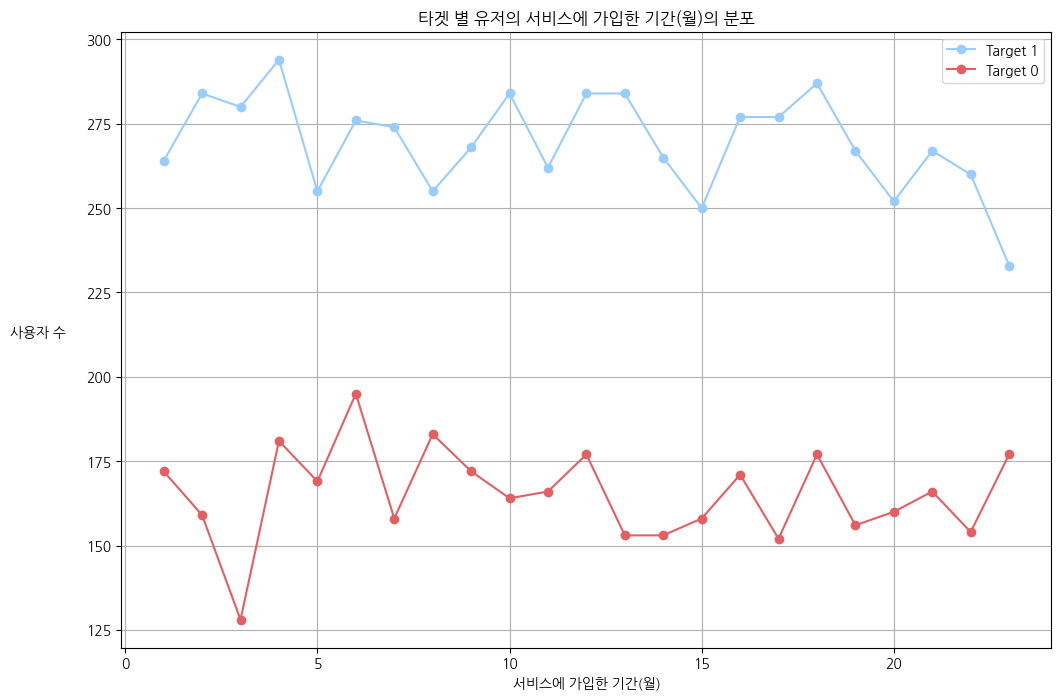

In [352]:
# mini 에서 target 값이 1인 행을 선택
target_1_subscription_duration = mini[mini['target'] == 1]

# mini 에서 target 값이 0인 행을 선택
target_0_subscription_duration = mini[mini['target'] == 0]

# '사용자가 서비스에 가입한 기간 (월)'의 분포 계산
subscription_duration_1 = target_1_subscription_duration['subscription_duration'].value_counts().sort_index()
subscription_duration_0 = target_0_subscription_duration['subscription_duration'].value_counts().sort_index()

# 꺽은선 그래프로 시각화

plt.figure(figsize=(12, 8))

subscription_duration_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
subscription_duration_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟 별 유저의 서비스에 가입한 기간(월)의 분포')
plt.xlabel('서비스에 가입한 기간(월)')
plt.ylabel('사용자 수',labelpad=35, rotation=360)

plt.legend()
plt.grid(True)
plt.show()

In [353]:
# mini 에서 target 값이 1인 행을 선택
subscription_distribution_data1 = mini[mini['target'] == 1]

# 월별 구독 분포
subscription_distribution_1_data = subscription_distribution_data1['subscription_duration'].value_counts().sort_index()

# 출력
print("Target 1인 사용자들의 월별 구독 분포")
print(subscription_distribution_1_data)

Target 1인 사용자들의 월별 구독 분포
subscription_duration
1     264
2     284
3     280
4     294
5     255
6     276
7     274
8     255
9     268
10    284
11    262
12    284
13    284
14    265
15    250
16    277
17    277
18    287
19    267
20    252
21    267
22    260
23    233
Name: count, dtype: int64


In [354]:
# mini 에서 target 값이 0인 행을 선택
subscription_distribution_data0 = mini[mini['target'] == 0]

# 월별 구독 분포
subscription_distribution_0_data = subscription_distribution_data0['subscription_duration'].value_counts().sort_index()

# 결과 출력
print("Target 0인 사용자들의 월별 구독 분포:")
print(subscription_distribution_0_data)

Target 0인 사용자들의 월별 구독 분포:
subscription_duration
1     172
2     159
3     128
4     181
5     169
6     195
7     158
8     183
9     172
10    164
11    166
12    177
13    153
14    153
15    158
16    171
17    152
18    177
19    156
20    160
21    166
22    154
23    177
Name: count, dtype: int64


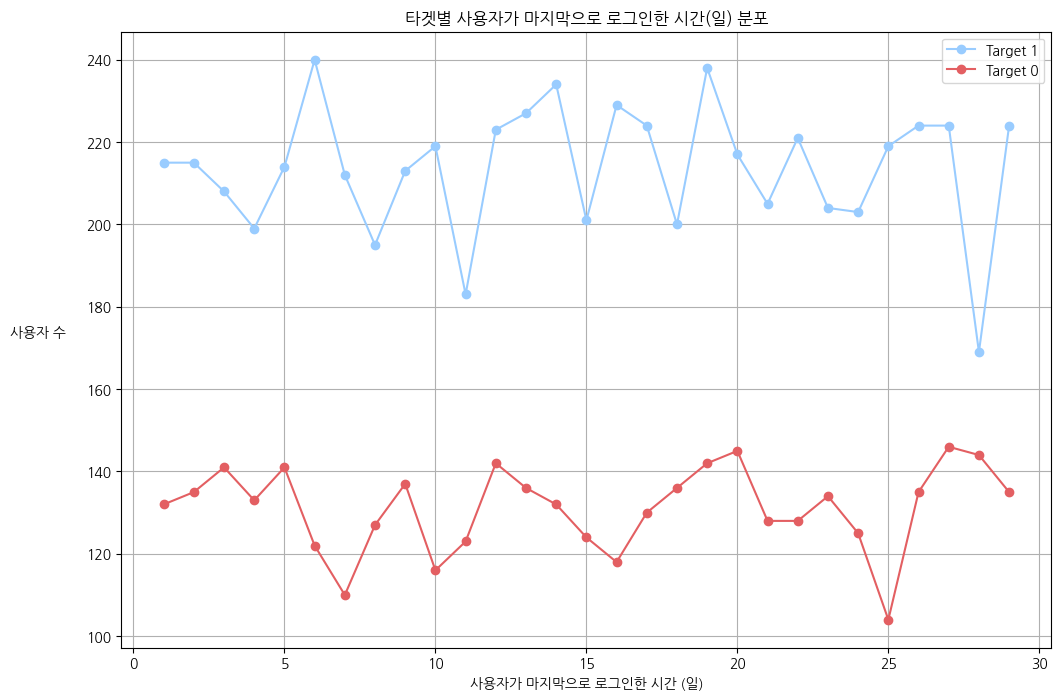

In [370]:
# target이 1인 유저의 데이터 필터링
target_1_recent_login_time = mini[mini['target'] == 1]

# target이 0인 유저의 데이터 필터링
target_0_recent_login_time = mini[mini['target'] == 0]

# '사용자가 마지막으로 로그인한 시간(일)'의 분포 계산
recent_login_time_1 = target_1_recent_login_time['recent_login_time'].value_counts().sort_index()
recent_login_time_0 = target_0_recent_login_time['recent_login_time'].value_counts().sort_index()

# 그래프 시각화
plt.figure(figsize=(12, 8))

recent_login_time_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
recent_login_time_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 사용자가 마지막으로 로그인한 시간(일) 분포')
plt.xlabel('사용자가 마지막으로 로그인한 시간 (일)')
plt.ylabel('사용자 수', labelpad=35, rotation=360)

plt.legend()
plt.grid(True)

plt.show()

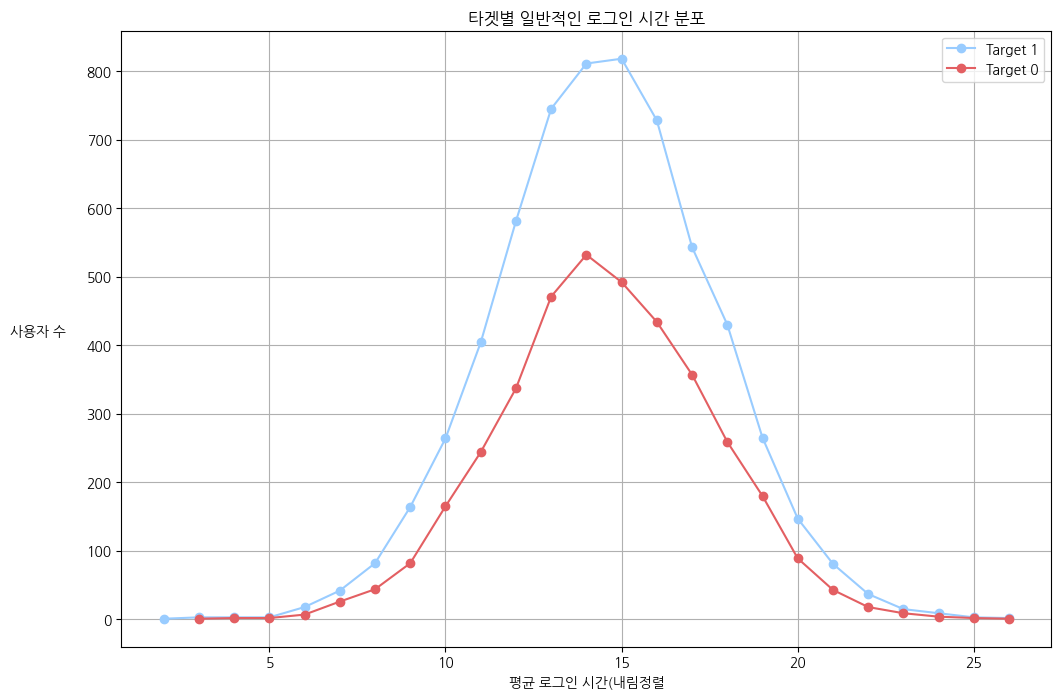

In [356]:
# 로그인 시간 값을 내림 처리하여 정수로 변환
mini['average_login_time'] = np.floor(mini['average_login_time'])

# 그룹화 및 target 별 평균 계산
# average_login_time 열 기준으로 그룹화 하고 데이터 크기 계산
avg_login_time_by_target_1 = mini[mini['target'] == 1].groupby('average_login_time').size()
avg_login_time_by_target_0 = mini[mini['target'] == 0].groupby('average_login_time').size()

# 그래프 시각화
plt.figure(figsize=(12, 8))

avg_login_time_by_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
avg_login_time_by_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 일반적인 로그인 시간 분포')
plt.xlabel('평균 로그인 시간(내림정렬')
plt.ylabel('사용자 수',labelpad=35, rotation=360)

plt.legend()
plt.grid(True)

plt.show()

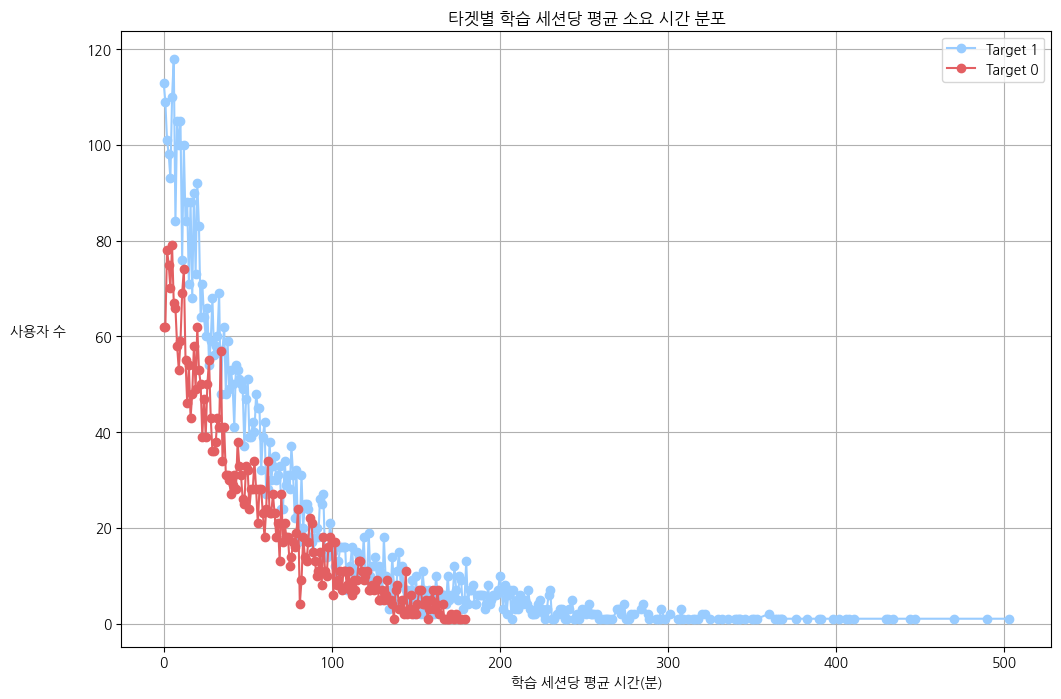

In [371]:
# 각 학습 시간의 값을 내림 처리하여 정수로 변환
mini['average_time_per_learning_session'] = np.floor(mini['average_time_per_learning_session'])

# target 별로 데이터 필터링
avg_time_per_session_target_1 = mini[mini['target'] == 1].groupby('average_time_per_learning_session').size()
avg_time_per_session_target_0 = mini[mini['target'] == 0].groupby('average_time_per_learning_session').size()

# 꺽은선 그래프로 시각화

plt.figure(figsize=(12, 8))

avg_time_per_session_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
avg_time_per_session_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 학습 세션당 평균 소요 시간 분포')
plt.xlabel('학습 세션당 평균 시간(분)')
plt.ylabel('사용자 수',labelpad=35, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

In [369]:
# target 0 학습 세션에 소요된 평균 시간 의 가장 큰 값을 구하기
max_avg_time_target_0 = mini[mini['target'] == 0]['average_time_per_learning_session'].max()
max_avg_time_target_0

179.0

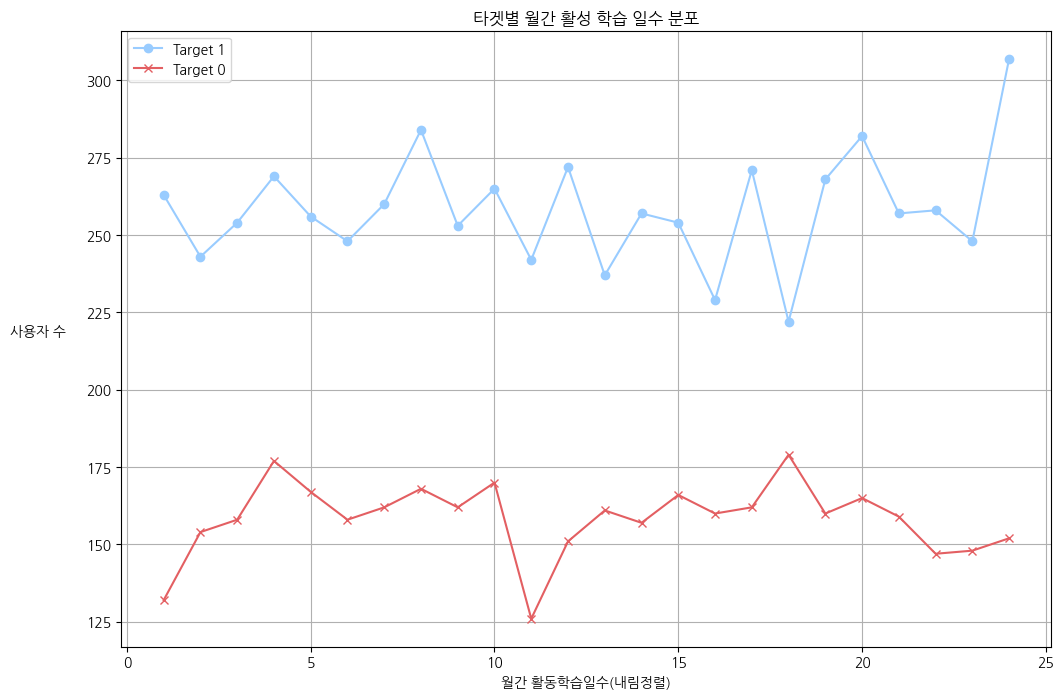

In [358]:
# target 별로 데이터 필터링
monthly_active_days_target_1 = mini[mini['target'] == 1].groupby('monthly_active_learning_days').size()
monthly_active_days_target_0 = mini[mini['target'] == 0].groupby('monthly_active_learning_days').size()

# 꺽은선 그래프로 시각화

plt.figure(figsize=(12, 8))

monthly_active_days_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
monthly_active_days_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 월간 활성 학습 일수 분포')
plt.xlabel('월간 활동학습일수(내림정렬)')
plt.ylabel('사용자 수',labelpad=35, rotation=360)

plt.legend()
plt.grid(True)
plt.show()

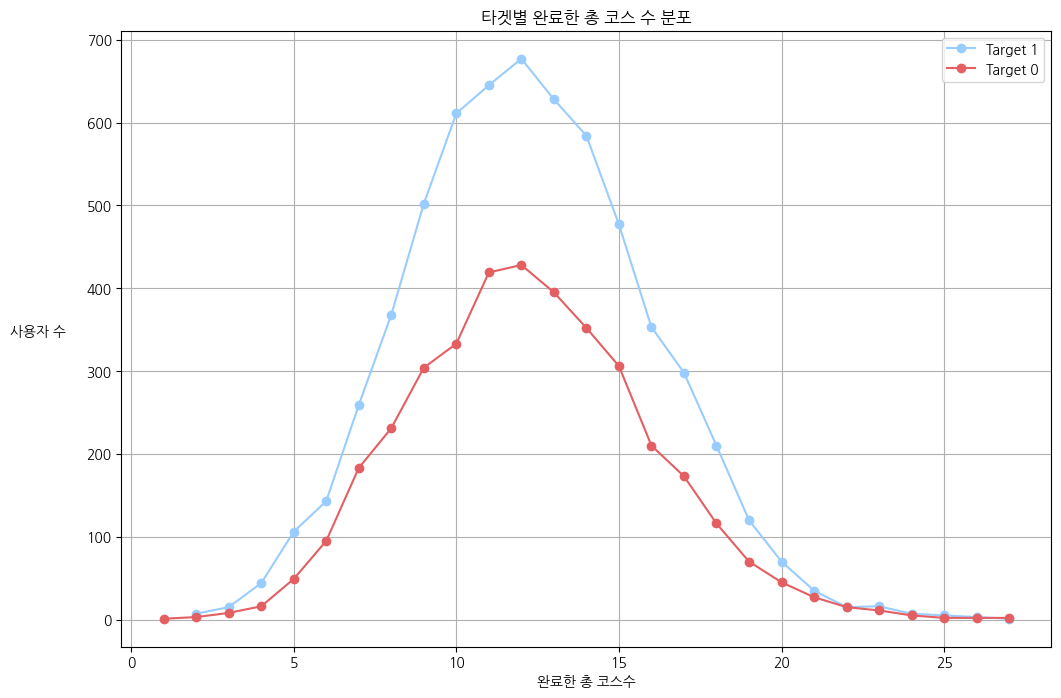

In [359]:
# 완료한 총 코스 수에 따른 target 별 데이터 필터링 및 시각화
total_completed_courses_target_1 = mini[mini['target'] == 1].groupby('total_completed_courses').size()
total_completed_courses_target_0 = mini[mini['target'] == 0].groupby('total_completed_courses').size()

# 꺽은선 그래프로 시각화
plt.figure(figsize=(12, 8))

total_completed_courses_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
total_completed_courses_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 완료한 총 코스 수 분포')
plt.xlabel('완료한 총 코스수')
plt.ylabel('사용자 수',labelpad=35, rotation=360)

plt.legend()
plt.grid(True)

plt.show()

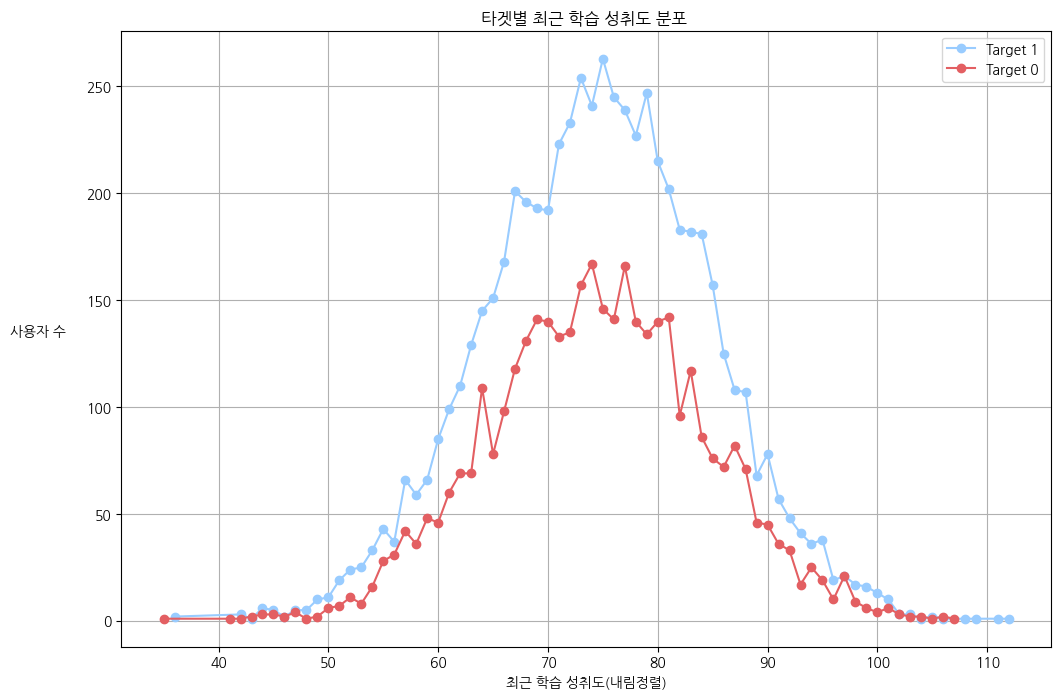

In [360]:
# '최근 학습 성취도'의 값을 내림 처리하여 정수로 변환
mini['recent_learning_achievement'] = np.floor(mini['recent_learning_achievement'])

# 내림 처리된 '최근 학습 성취도'에 따른 target 별 데이터 필터링 및 시각화
recent_achievement_target_1 = mini[mini['target'] == 1].groupby('recent_learning_achievement').size()
recent_achievement_target_0 = mini[mini['target'] == 0].groupby('recent_learning_achievement').size()

# 꺽은선 그래프로 시각화
plt.figure(figsize=(12, 8))

recent_achievement_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
recent_achievement_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

plt.title('타겟별 최근 학습 성취도 분포 ')
plt.xlabel('최근 학습 성취도(내림정렬)')
plt.ylabel('사용자 수', labelpad=35, rotation=360)


plt.legend()
plt.grid(True)
plt.show()

In [361]:
# # '커뮤니티 참여도'에 따른 target 별 데이터 필터링 및 시각화
# community_engagement_target_1 = mini[mini['target'] == 1].groupby('community_engagement_level').size()
# community_engagement_target_0 = mini[mini['target'] == 0].groupby('community_engagement_level').size()

# # 꺽은선 그래프로 시각화

# plt.figure(figsize=(12, 8))

# community_engagement_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
# community_engagement_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

# plt.title('Community Engagement Level by Target')
# plt.xlabel('Community Engagement Level')
# plt.ylabel('Number of Users')

# plt.legend()
# plt.grid(True)
# plt.show()

# # '커뮤니티 참여도'에 따른 target 별 데이터 필터링 및 시각화
# community_engagement_target_1 = mini[mini['target'] == 1].groupby('community_engagement_level').size()
# community_engagement_target_0 = mini[mini['target'] == 0].groupby('community_engagement_level').size()

# # 꺽은선 그래프로 시각화
# plt.figure(figsize=(12, 8))
# community_engagement_target_1.plot(kind='line', marker='o', label='Target 1', color=''#99ccff')
# community_engagement_target_0.plot(kind='line', marker='o', label='Target 0', color=''#e35f62')

# # X 축 눈금 조정
# plt.xticks(range(1, 6))  # 1부터 5까지의 정수 값을 X 축 눈금으로 설정

# plt.title('Community Engagement Level by Target')
# plt.xlabel('Community Engagement Level')
# plt.ylabel('Number of Users')
# plt.legend()
# plt.grid(True)
# plt.show()

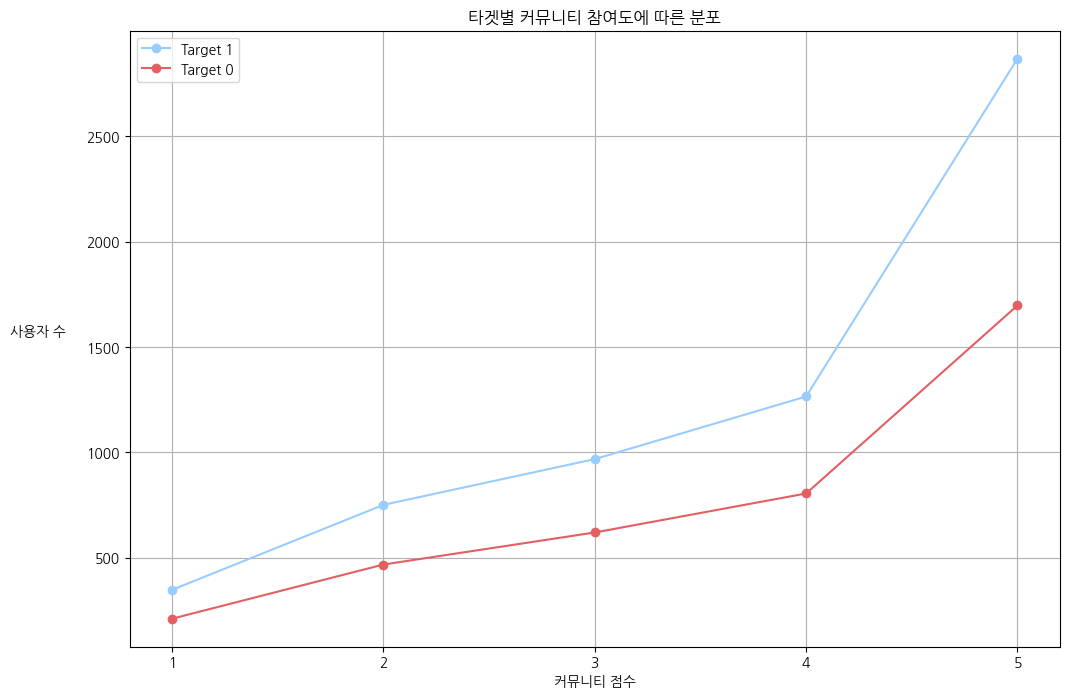

In [362]:
# 커뮤니티 참여도에 따른 target 별 데이터 필터링 및 시각화
community_engagement_target_1 = mini[mini['target'] == 1].groupby('community_engagement_level').size()
community_engagement_target_0 = mini[mini['target'] == 0].groupby('community_engagement_level').size()

# 꺽은선 그래프로 시각화
plt.figure(figsize=(12, 8))
community_engagement_target_1.plot(kind='line', marker='o', label='Target 1', color='#99ccff')
community_engagement_target_0.plot(kind='line', marker='o', label='Target 0', color='#e35f62')

# X 축 눈금 조정
plt.xticks(range(1, 6))  # 1부터 5까지의 정수 값을 X 축 눈금으로 설정

plt.title('타겟별 커뮤니티 참여도에 따른 분포')
plt.xlabel('커뮤니티 점수')
plt.ylabel('사용자 수', labelpad=35, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

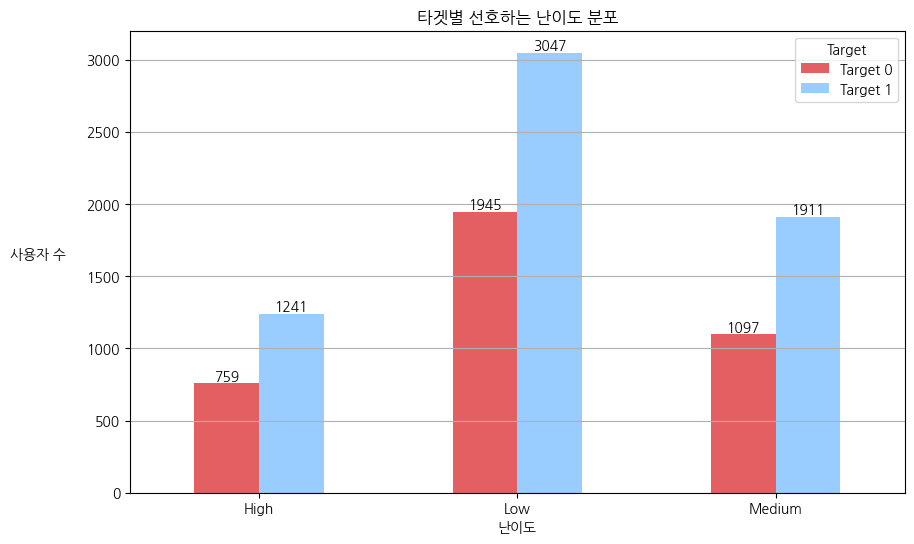

In [363]:
# 선호하는 난이도의 분포 계산
difficulty_distribution = pd.crosstab(index=mini['preferred_difficulty_level'], columns=mini['target'])

# 막대 그래프로 시각화
bargraph = difficulty_distribution.plot(kind='bar', figsize=(10, 6),color=['#e35f62', '#99ccff'])
plt.title('타겟별 선호하는 난이도 분포')
plt.xlabel('난이도')
plt.ylabel('사용자 수', labelpad=35, rotation=360)
plt.xticks(rotation=0)  # X 축 레이블 회전 없음
plt.legend(title='Target', labels=['Target 0', 'Target 1'])
plt.grid(True, axis='y')


# 각 막대 위에 데이터 값 표시 및 중앙 정렬
for p in bargraph.patches:
    bargraph.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.show()

# https://pydole.tistory.com/entry/Python-matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84%EC%97%90-%EA%B0%92-%ED%91%9C%EC%8B%9C-%ED%95%98%EA%B8%B0

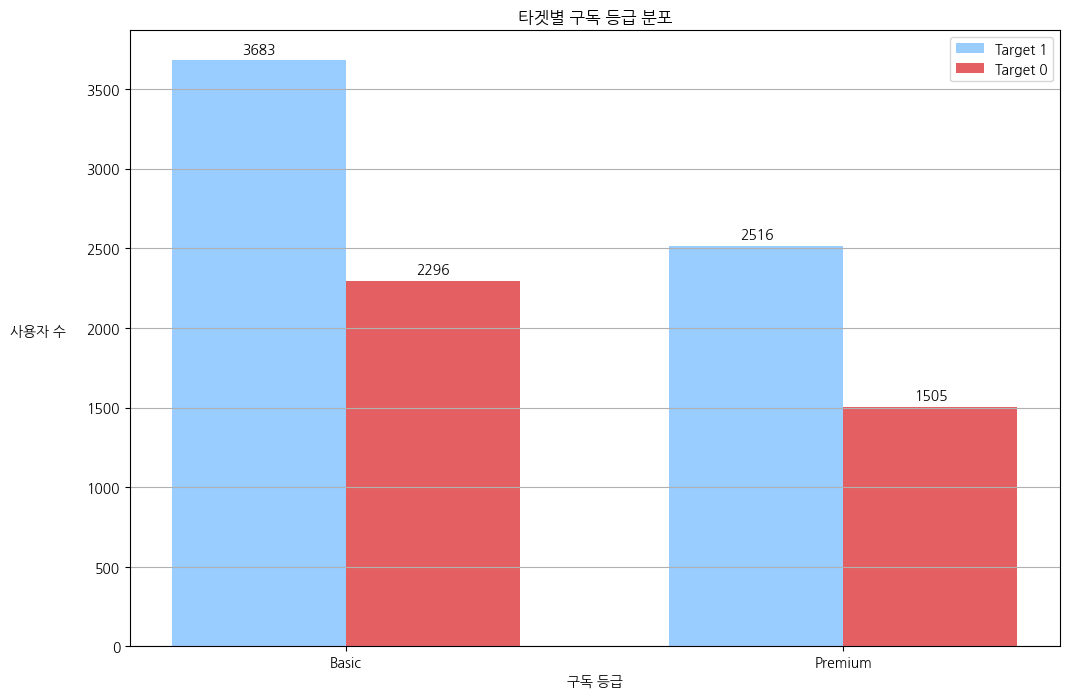

In [364]:
subscription_type_target_1 = mini[mini['target'] == 1].groupby('subscription_type').size()
subscription_type_target_0 = mini[mini['target'] == 0].groupby('subscription_type').size()

# 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(12, 8))
subscription_types = sorted(mini['subscription_type'].unique())
index = np.arange(len(subscription_types))
bar_width = 0.35

bars1 = plt.bar(index, subscription_type_target_1, bar_width, label='Target 1', color='#99ccff')
bars2 = plt.bar(index + bar_width, subscription_type_target_0, bar_width, label='Target 0', color='#e35f62')

plt.title('타겟별 구독 등급 분포')
plt.xlabel('구독 등급')
plt.ylabel('사용자 수',labelpad=35, rotation=360)

plt.xticks(index + bar_width / 2, subscription_types)
plt.legend()
plt.grid(True, axis='y')

# 각 막대 위에 데이터 값 표시, 중앙 정렬
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(ax, bars1)
add_value_labels(ax, bars2)

plt.show()

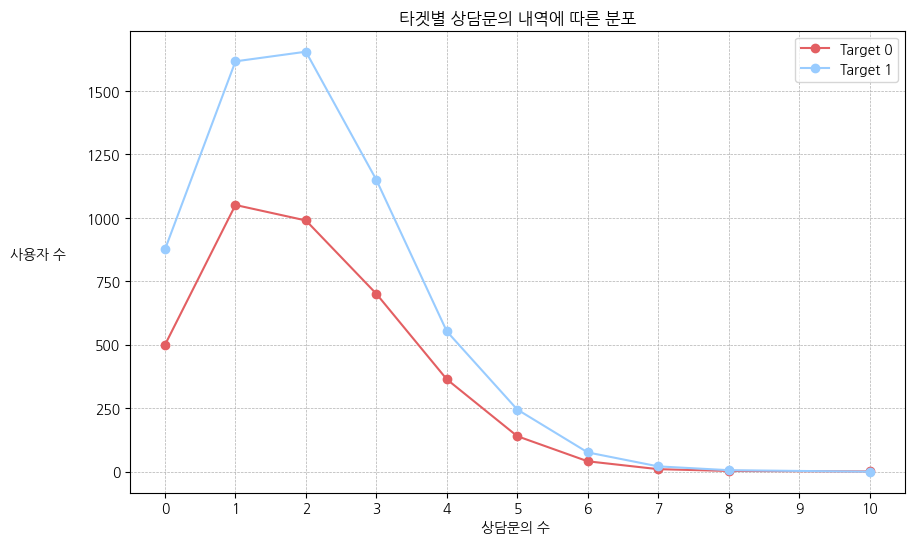

In [365]:
# 상담문의 내역에 따른 target 별 데이터 필터링
customer_inquiry_distribution = pd.crosstab(index=mini['customer_inquiry_history'], columns=mini['target'])

# 꺽은선형 그래프로 시각화
ax = customer_inquiry_distribution.plot(kind='line', figsize=(10, 6), marker='o', color=['#e35f62', '#99ccff'])

plt.xticks(range(0, 11))  # 1부터 5까지의 정수 값을 X 축 눈금으로 설정

plt.title('타겟별 상담문의 내역에 따른 분포')
plt.xlabel('상담문의 수 ')
plt.ylabel('사용자 수', labelpad=35, rotation=360)

plt.legend( labels=['Target 0', 'Target 1'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [366]:
# # target이 1인 경우의 '결제 패턴' 분포 계산
# payment_pattern_distribution = mini[mini['target'] == 1]['payment_pattern'].value_counts()

# # 원형 그래프로 시각화
# plt.figure(figsize=(8, 8))
# plt.pie(payment_pattern_distribution, labels=payment_pattern_distribution.index, autopct='%1.1f%%', startangle=140)
# plt.title('Payment Pattern Distribution for Users Who Continued (Target 1)')
# plt.show()

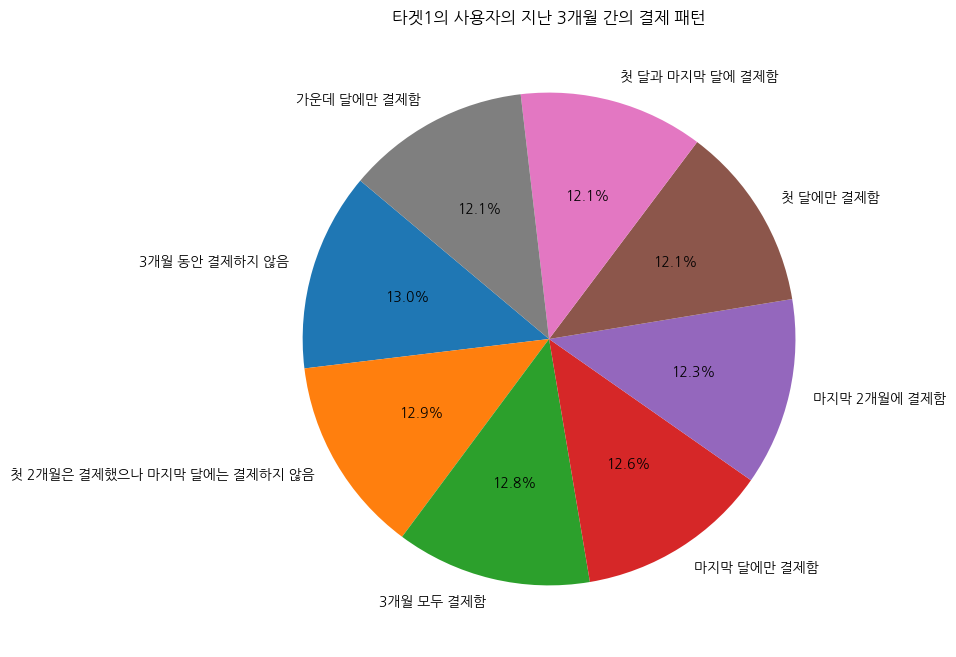

In [367]:
# target이 1인 경우의 '결제 패턴' 분포 계산 및 레이블 지정
payment_pattern_distribution = mini[mini['target'] == 1]['payment_pattern'].value_counts()
payment_pattern_labels = {
    7: "3개월 모두 결제함",
    6: "첫 2개월은 결제했으나 마지막 달에는 결제하지 않음",
    5: "첫 달과 마지막 달에 결제함",
    4: "첫 달에만 결제함",
    3: "마지막 2개월에 결제함",
    2: "가운데 달에만 결제함",
    1: "마지막 달에만 결제함",
    0: "3개월 동안 결제하지 않음"
}

# 순서와 레이블을 조정하여 원형 그래프 데이터 준비
labels = [payment_pattern_labels[pattern] for pattern in payment_pattern_distribution.index]

# 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(payment_pattern_distribution, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('타겟1의 사용자의 지난 3개월 간의 결제 패턴')
plt.show()

In [348]:
# # target이 1인 경우의 '결제 패턴' 분포 계산
# payment_pattern_distribution = mini[mini['target'] == 0]['payment_pattern'].value_counts()

# # 원형 그래프로 시각화
# plt.figure(figsize=(8, 8))
# plt.pie(payment_pattern_distribution, labels=payment_pattern_distribution.index, autopct='%1.1f%%', startangle=140)
# plt.title('Payment Pattern Distribution for Users Who Continued (Target 0)')
# plt.show()

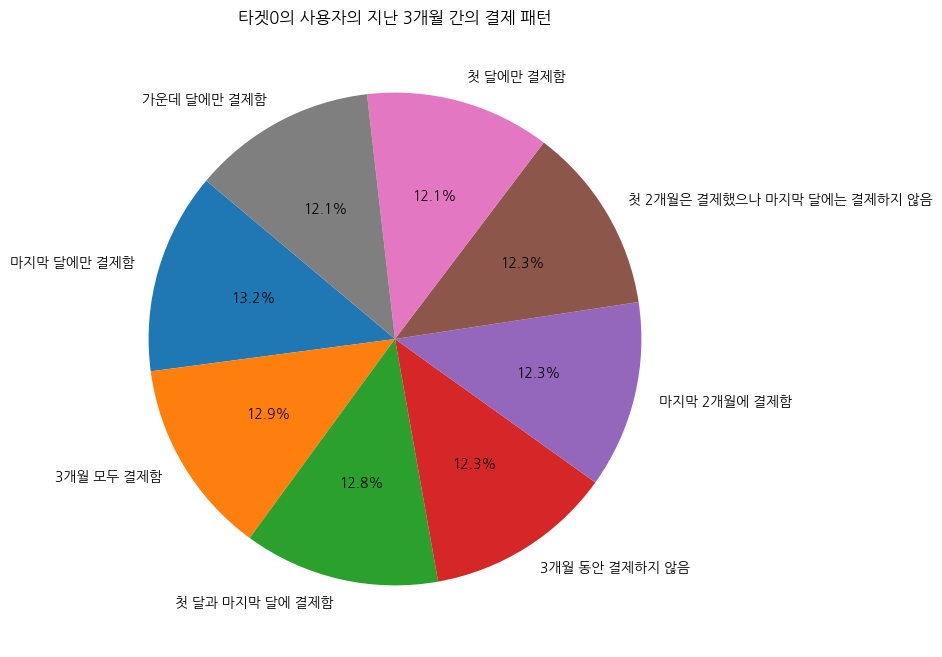

In [368]:
# target이 1인 경우의 '결제 패턴' 분포 계산 및 레이블 지정
payment_pattern_distribution = mini[mini['target'] == 0]['payment_pattern'].value_counts()
payment_pattern_labels = {
    7: "3개월 모두 결제함",
    6: "첫 2개월은 결제했으나 마지막 달에는 결제하지 않음",
    5: "첫 달과 마지막 달에 결제함",
    4: "첫 달에만 결제함",
    3: "마지막 2개월에 결제함",
    2: "가운데 달에만 결제함",
    1: "마지막 달에만 결제함",
    0: "3개월 동안 결제하지 않음"
}

# 순서와 레이블을 조정하여 원형 그래프 데이터 준비
labels = [payment_pattern_labels[pattern] for pattern in payment_pattern_distribution.index]

# 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(payment_pattern_distribution, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('타겟0의 사용자의 지난 3개월 간의 결제 패턴')
plt.show()

### 결론

데이터의 다양한 요소들을 비교 분석해 본 결과, 대부분의 동향은 비슷한 양상을 보입니다. 예를 들어, 사용자의 커뮤니티 참여도나 결제 패턴 등은 구독을 계속하는 사용자(Target 1)와 구독을 취소하는 사용자(Target 0) 간에 큰 차이가 없는 것으로 나타났습니다. 그러나 '각 학습 세션에 소요된 평균 시간(분)'을 분석했을 때, 차이가 보입니다.

구독을 계속하는 사용자(Target 1)의 경우, 학습 세션당 평균 소요 시간이 다양하게 분포되어 있습니다.
반면, 구독을 취소하는 사용자(Target 0)의 경우, 특정 시간부터는 학습 세션의 분포가 전혀 없습니다. 이는 구독을 취소하는 사용자들이 일정 시간 이상 학습 세션에 참여하는 경우가 드물다는 것을 의미하며, 학습에 투자하는 시간의 부족이 구독 취소와 연관될 수 있음을 암시합니다.

따라서, 사용자가 더 다양하고 깊이 있는 학습 경험을 할 수 있도록 도와주는 콘텐츠와 기능의 개발이 중요할 수 있습니다. 이를 통해 사용자의 학습 몰입도와 만족도를 높이고, 최종적으로는 구독 유지율을 향상시킬 수 있을 것입니다.
